In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [6]:
data = pd.read_csv("../data/preprocessed_data.csv")

In [7]:
data.head()

,Airline,Source,Destination,Duration,stops,class,depature time,arrival time,Price,Date,Season
0,Iberia,ROM,CMN,580,1,business,Morning,Night,4135.95,2024-03-17,Spring
1,Transavia,ROM,CMN,590,1,economy,Early Morning,Afternoon,2443.35,2024-06-01,Summer
2,Lufthansa,ROM,CMN,570,2,economy,Afternoon,Late Night,2156.70,2024-09-03,Autumn
3,Egypt Air,IST,ROM,640,1,business,Late Night,Afternoon,5561.01,2024-02-10,Winter
4,TAROM,IST,PAR,350,1,business,Morning,Afternoon,8097.18,2024-04-18,Spring


In [8]:
data.dtypes

Airline           object
Source            object
Destination       object
Duration           int64
stops              int64
class             object
depature time     object
arrival time      object
Price            float64
Date              object
Season            object
dtype: object

In [9]:
data.describe()

,Duration,stops,Price
count,4368.000000,4368.000000,4368.000000
mean,424.201007,0.627289,4804.770625
std,311.760060,0.583575,3764.780773
min,115.000000,0.000000,303.030000
25%,185.000000,0.000000,1883.700000
50%,332.500000,1.000000,3816.540000
75%,570.000000,1.000000,6877.552500
max,3225.000000,2.000000,35708.400000


# Data Visualization

#### Distribution du prix

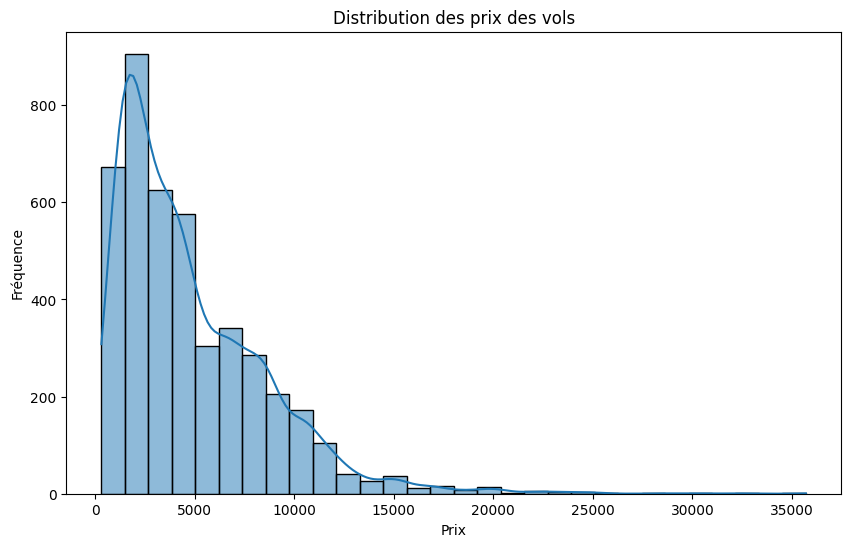

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution des prix des vols')
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

#### Distribution des vols

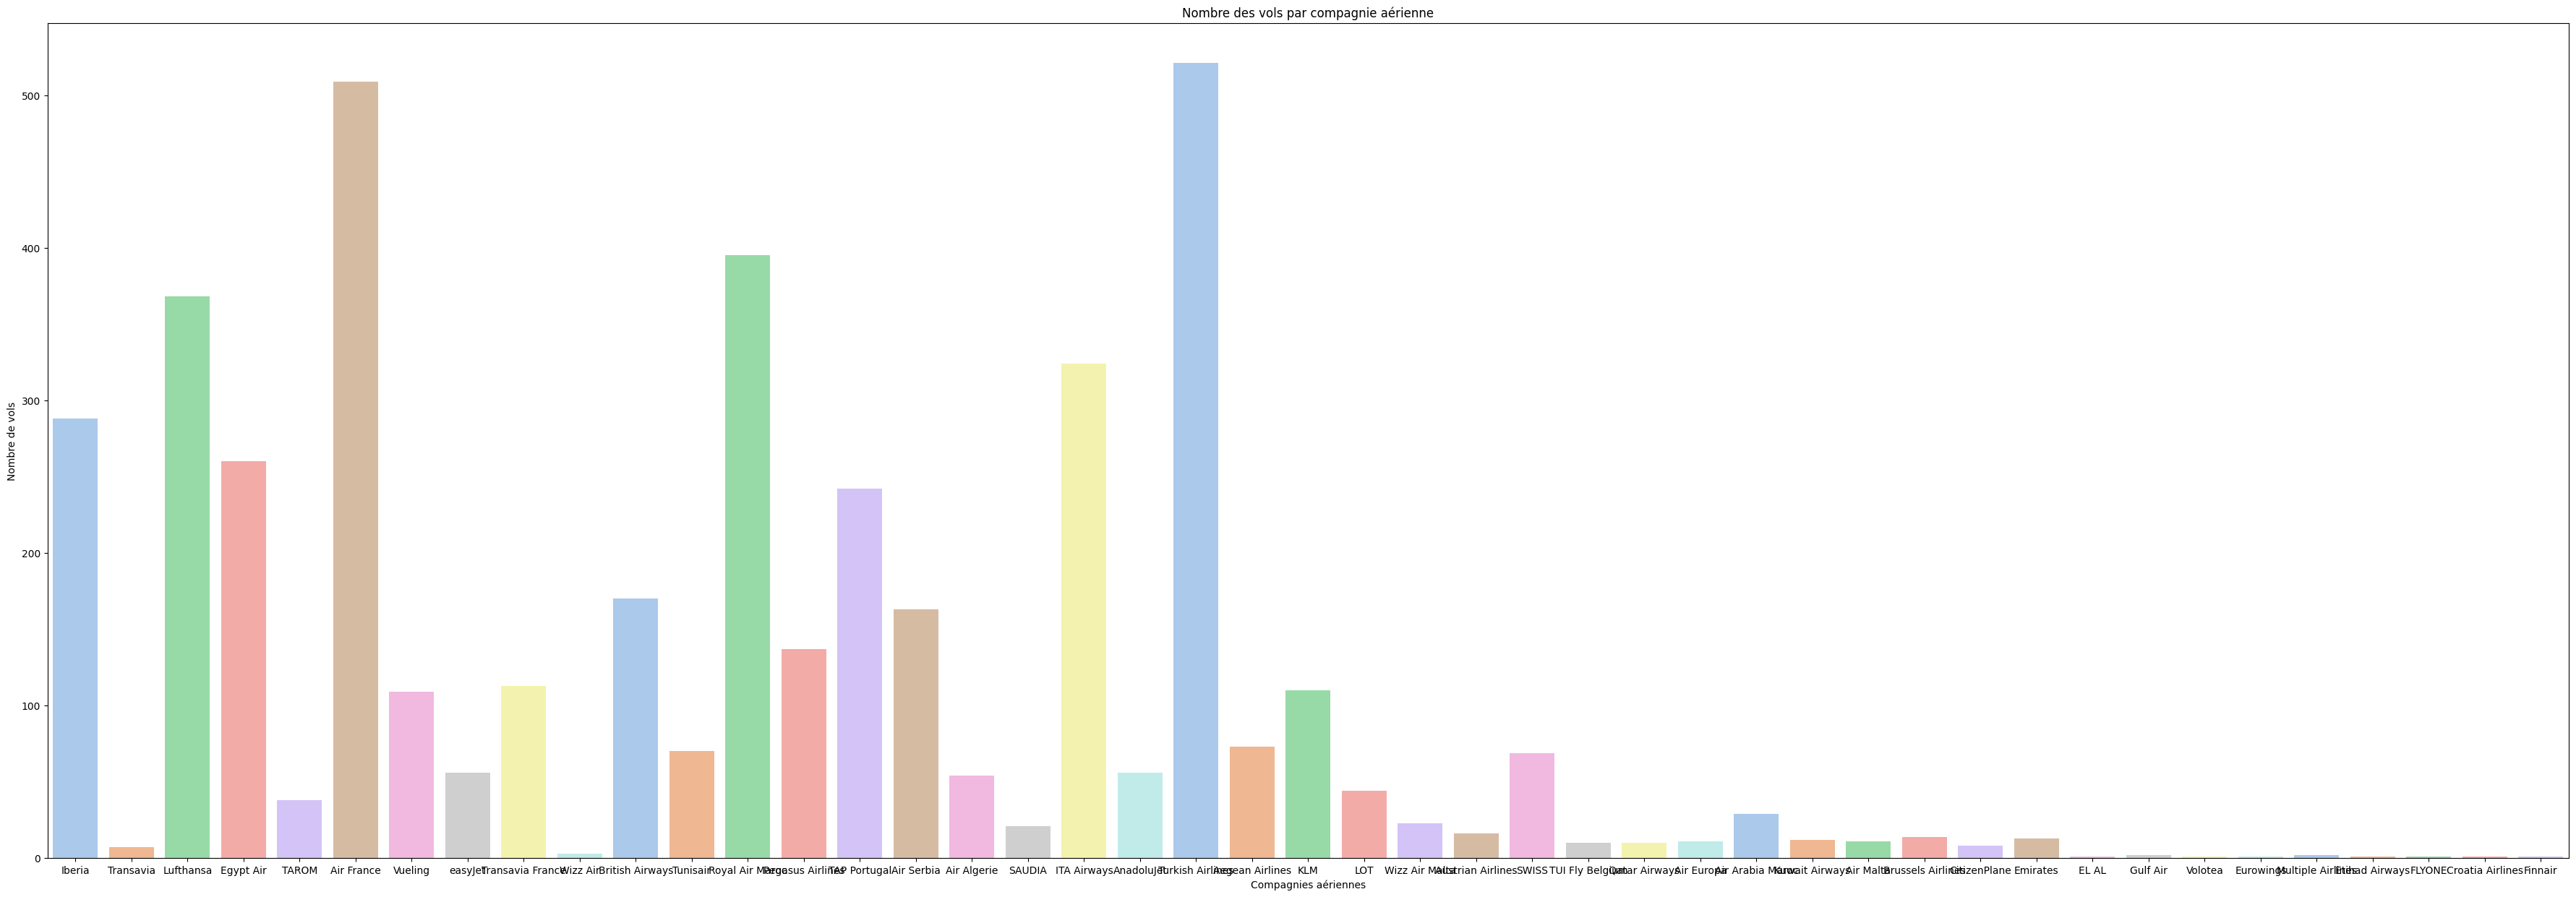

In [11]:
plt.figure(figsize=(45, 15))
sns.countplot(x='Airline', data=data, palette="pastel")
plt.title('Nombre des vols par compagnie aérienne')
plt.xlabel('Compagnies aériennes')
plt.ylabel('Nombre de vols')
plt.show()

#### Distribution de la saison 

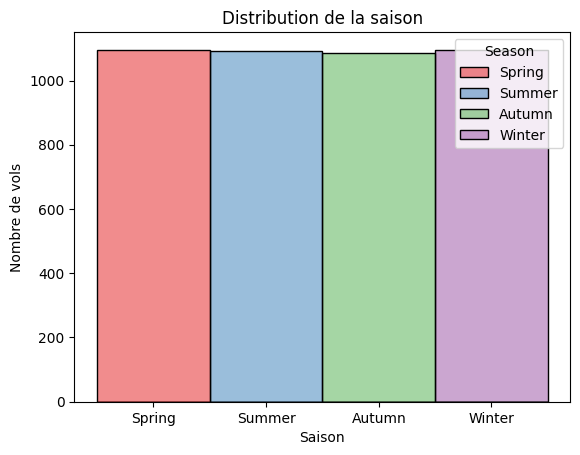

In [12]:
sns.histplot(data=data, x='Season', kde=False, bins=20, hue='Season', palette='Set1')
plt.title('Distribution de la saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de vols')
plt.show()

#### Prix moyen par saison et classe de vol

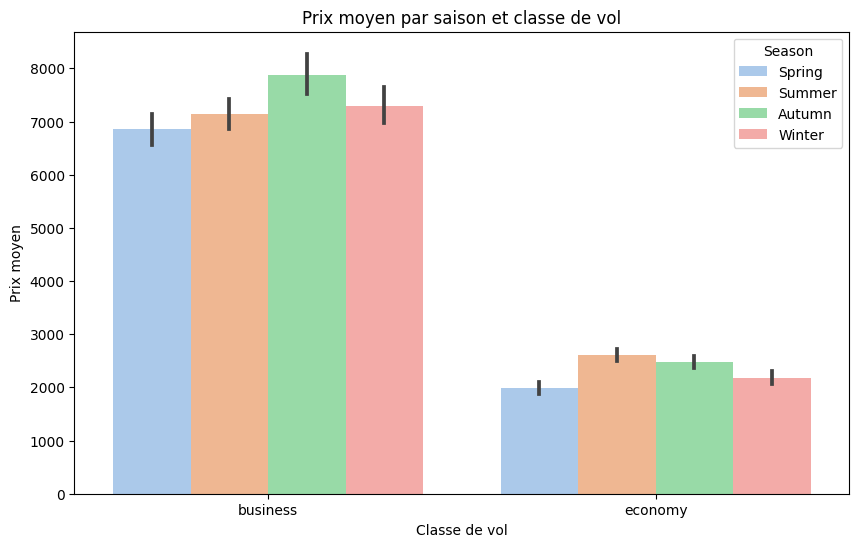

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='Price', hue='Season', data=data,palette="pastel")
plt.title('Prix moyen par saison et classe de vol')
plt.xlabel('Classe de vol')
plt.ylabel('Prix moyen')
plt.show()

#### La distribution du prix par nombre de stops

In [25]:
fig = px.violin(data, 
                x='stops', 
                y='Price', 
                color='stops'
                )
fig.show()

#### Répartition des prix par heure de départ, heure d’arrivée et saison

In [33]:
fig = px.box(data, x="depature time", y="Price", color="Season", facet_col="arrival time", 
             title="Répartition des prix par heure de départ, heure d’arrivée et saison",
             labels={"Prix": "Price", "Heure de départ": "Departure Time", "Heure d'arrivée": "Arrival Time", "Saison": "Season"},
             category_orders={"Heure de départ": sorted(data['depature time'].unique()), 
                              "": sorted(data['arrival time'].unique()),
                              "Season": sorted(data['Season'].unique())})
fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()

#### Boîte à moustaches pour la détection des valeurs aberrantes

Text(0.5, 0, 'Duration')

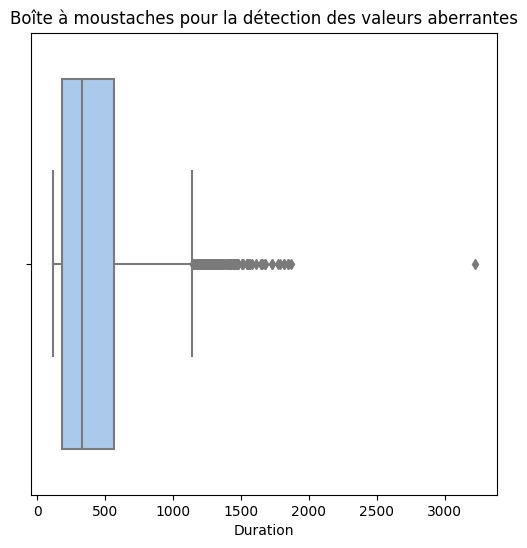

In [26]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data['Duration'],palette="pastel")
plt.title('Boîte à moustaches pour la détection des valeurs aberrantes')
plt.xlabel('Durée')

#### Supprimer les valeurs aberrantes

In [34]:
lower = data['Duration'].quantile(0.25)
upper =data['Duration'].quantile(0.75)
low = data['Duration'] < lower
up = data['Duration'] > upper
data['Duration'] = data['Duration'][~(low|up)]
data.dropna(inplace=True)
data.reset_index(drop = True,inplace=True)

#### Boîte à moustaches aprés suppression des valeurs aberrantes

Text(0.5, 0, 'Durée')

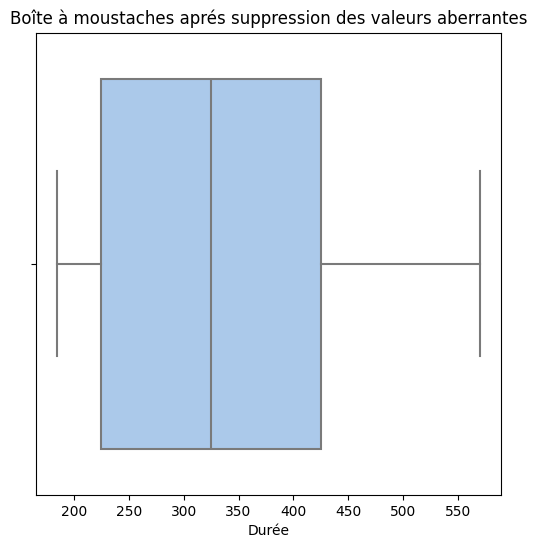

In [37]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data['Duration'],palette="pastel")
plt.title('Boîte à moustaches aprés suppression des valeurs aberrantes')
plt.xlabel('Durée')

# Encodage des valeurs catégorielles 

#### Label encoding

In [39]:
le=LabelEncoder()
ordinal_variables=['Airline','class','depature time','arrival time','Season']
data[ordinal_variables] = data[ordinal_variables].apply(lambda col: le.fit_transform(col))

#### One-hot encoding

In [40]:
final_df= pd.get_dummies(data, columns=['Source', 'Destination'])
final_df

,Airline,Duration,stops,class,depature time,arrival time,Price,Date,Season,Source_CMN,Source_IST,Source_PAR,Source_ROM,Destination_CMN,Destination_IST,Destination_PAR,Destination_ROM
0,19,570.0,2,1,0,3,2156.70,2024-09-03,0,0,0,0,1,1,0,0,0
1,24,350.0,1,0,4,0,8097.18,2024-04-18,1,0,1,0,0,0,0,1,0
2,19,505.0,1,1,2,3,3194.10,2024-07-04,2,0,1,0,0,1,0,0,0
3,4,525.0,1,1,0,5,1719.90,2024-01-12,3,0,0,0,1,1,0,0,0
4,19,505.0,1,0,2,3,5733.00,2024-07-04,2,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,4,475.0,1,0,4,2,6060.60,2024-06-01,2,1,0,0,0,0,0,0,1
2285,2,550.0,1,1,1,2,2511.60,2024-02-10,3,1,0,0,0,0,1,0,0
2286,10,510.0,1,0,4,2,6734.91,2024-08-16,2,0,0,1,0,0,0,0,1
2287,20,230.0,0,1,0,0,3559.92,2024-09-03,0,0,1,0,0,0,0,1,0


In [44]:
final_df.drop(columns="Date",inplace=True)

In [46]:
final_df.to_csv("..\data\\flight_data.csv", index=False)